### What is Feature Extraction from text ?

text representation or text vectorization

### Why do we need it ?

you have to give correct features because features matters a lot.

### why it is difficult ?
Because convertnig text in numbers is not so trivial. you have to represent it such that those numbers are suitable to provide you the meaning as well.

### what's the core idea ?
numbers should convey a semantic meaning of the text which you have converted in numbers.

### famous techniques ?

OHE, BOW, ngrams, TFIDF, custome features, Word2Vec.


1. Corpus : combination of all the words given in a dataset.
2. Vocabulary : Unique Words in the dataset
3. Document : each review (row) is document.
4. Word : Each individual word of document is Word

# 1. OHE

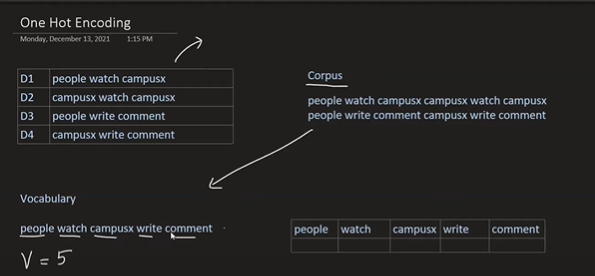

D1 people watch campusx
D2 campusx watch campusx
D3 people write comment
D4 campusx write campusx 

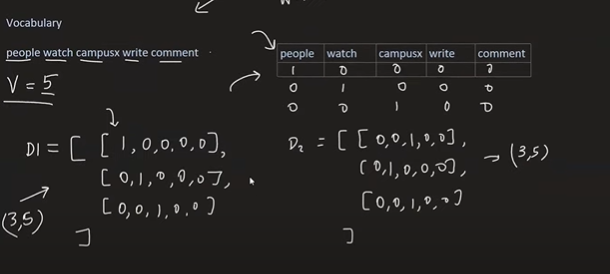


vocabulary = people watch campusx write comment.  == V = 5

document ke har word ko V dimentional vector me represent karna hai


D1 = people watch campusx =  [ [1,0,0,0,0][0,1,0,0,0][0,0,1,0,0] ]

D2 = campusx watch campusx = [ [0,0,1,0,0][0,1,0,0,0][0,0,1,0,0] ]

D3 = people write comment =  [ [1,0,0,0,0][0,0,0,1,0][0,0,1,0,0] ]

D4 = campusx write campusx = [ [0,0,1,0,0][0,0,0,1,0][0,0,1,0,0] ]


#### Pros: 
- Intuitive
- Easy Implementation 
#### Flaws:
- Sparsity [imagine you have 50000 words in vocabulary then each word will be representated in 50000, if there are 4000 ducments then we need space 4000 * 50000]
- No fixed Size 
    ```for example: D1 people watch campusx [3, 3]
        D2 campusx watch campusx Extra Words [5, 3]
        D3 people write comment [3, 3]
        
        Now as D2 ki size 5, 3 ho gyi hai hamari pass fix size ka vector bacha hi nhi hai. vo ek dikkat hai kyuki ML algo ko fixed input size deni hoti hai
        ```
- Out of vocabualary (OOV)
    ```
    D1 people watch campusx
    D2 campusx watch campusx
    D3 people write comment

    yha ek naya D4 doc aa jaye with Hello People Campusx 
    Hello matlab nhi pata how to handle bhi nhi pata to word vocabulary se hi bahar ho gya hai
    ```
- No capturing of semantic meaning
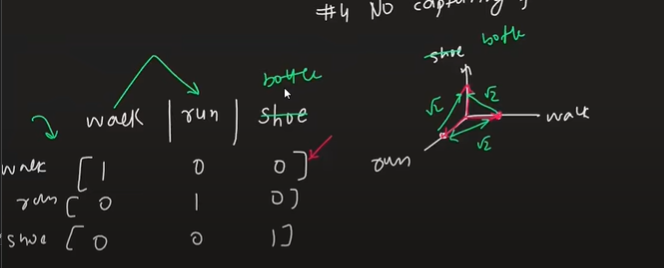
```
yha humne bottle or run ko bhi similar saa bana diya equidistance karke. but semantically walk run se related hai par run bottle se nhi.
```


# Bag of Words


moslty used for text classification.
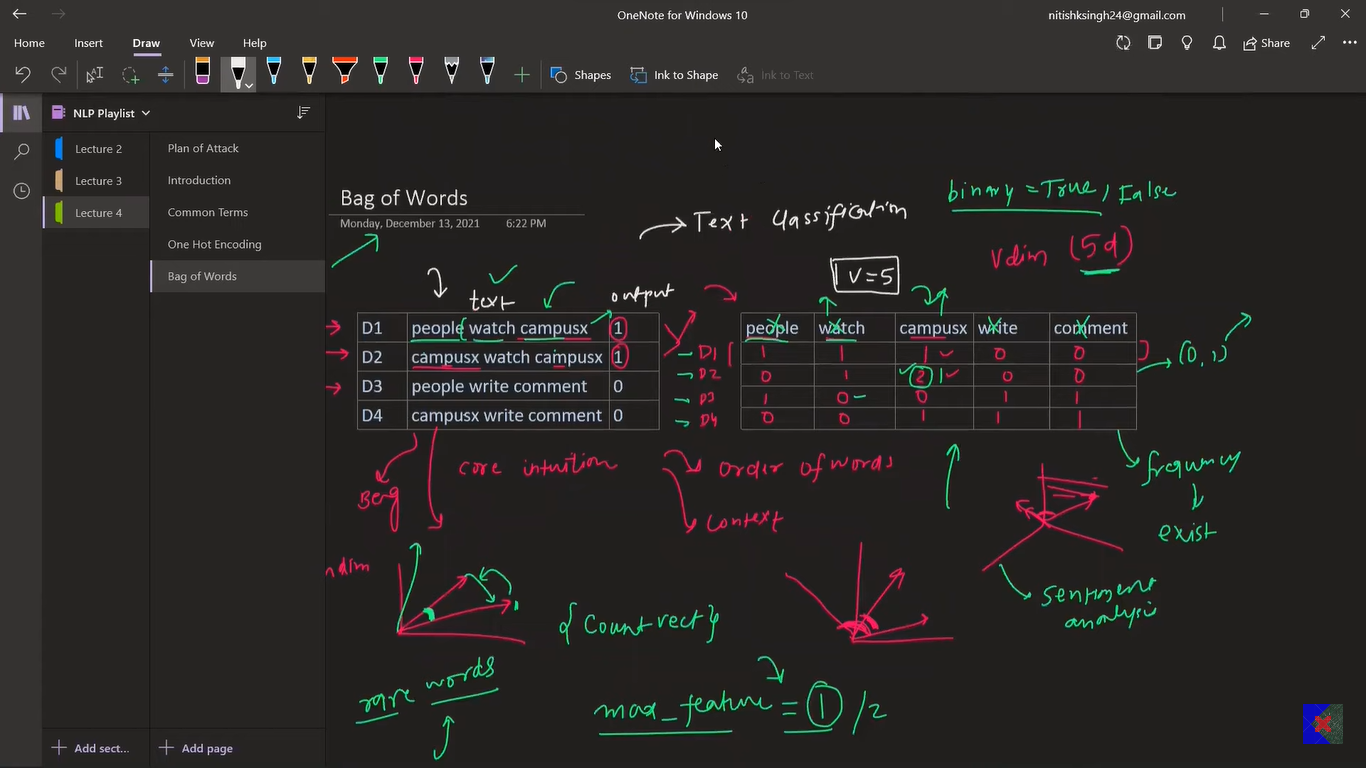
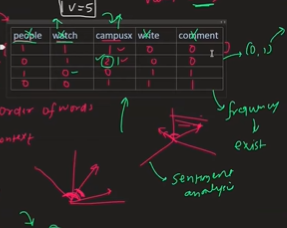

In [5]:
# D1: people watch campusx
# D2: campusx watch campusx
# D3: people write comment
# D4: campusx write campusx 

# make a dataframe of the documents given above
import pandas as pd
df = pd.DataFrame({'documents': ['people watch campusx', 'campusx watch campusx', 'people write comment', 'campusx write campusx'], 'output': ['1', '1', '0', '0']})

In [6]:
df

,documents,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write campusx,0


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [10]:
## could be written as cv.fit_transform(df['documents']) as well
bow = cv.fit_transform(df.documents) # fit_transform() does two functions: First, it fits the model and learns the vocabulary; second, it transforms our training data into feature vectors. The input to fit_transform should be a list of strings.

In [11]:
print(cv.vocabulary_) # prints the vocabulary of our corpus,  (Word : Index)

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


In [12]:
print(bow.toarray()) # returns the term document matrix

[[1 0 1 1 0]
 [2 0 0 1 0]
 [0 1 1 0 1]
 [2 0 0 0 1]]


In [14]:
cv.transform(['people likes to watch campusx, campusx is favourite person']).toarray() # returns the vector representation of the sentence

## it handles the words which are not in the vocabulary as well


array([[2, 0, 1, 1, 0]], dtype=int64)

In [ ]:
## lowercase = True converts all the words into lowercase before tokenizing them.
## stop_words = 'english' removes all the words which appear in the built-in list of english stop words in scikit-learn.
## token_pattern = r'\b[a-zA-Z]{3,}\b' ensures that the returned tokens contain only alphabets(a-zA-Z) and are of length greater than 3.
## binary = True means that all non zero counts are set to 1, used in sentiment analysis where multiple occurrences of a word do not matter much.
## max_features = 5 means that we want to consider only 5 features, i.e. the 5 most frequently occurring words. 

"""
# Advantage:
- It is very simple and intuitive.
- Size of the vocabulary remains same, regardless of the length of the document.
- semantic meaning of the word is preserved in some way not completely.

# Disadvantage:
- Sparse matrix: i.e. a lot of entries will be 0. overfitting problem due to high dimensionality and many 0 entries.
- OOV: words are not handled.
- Ordering: left to right order is not preserved, so it is not useful in NLP tasks which require sequence information or meaning of the sentence.
- exmplae: "This is a very good movie " and "This is not a very good movie" will have same vector representation but different meaning. So, bag of does not capture such big differences.
"""

# N-Grams


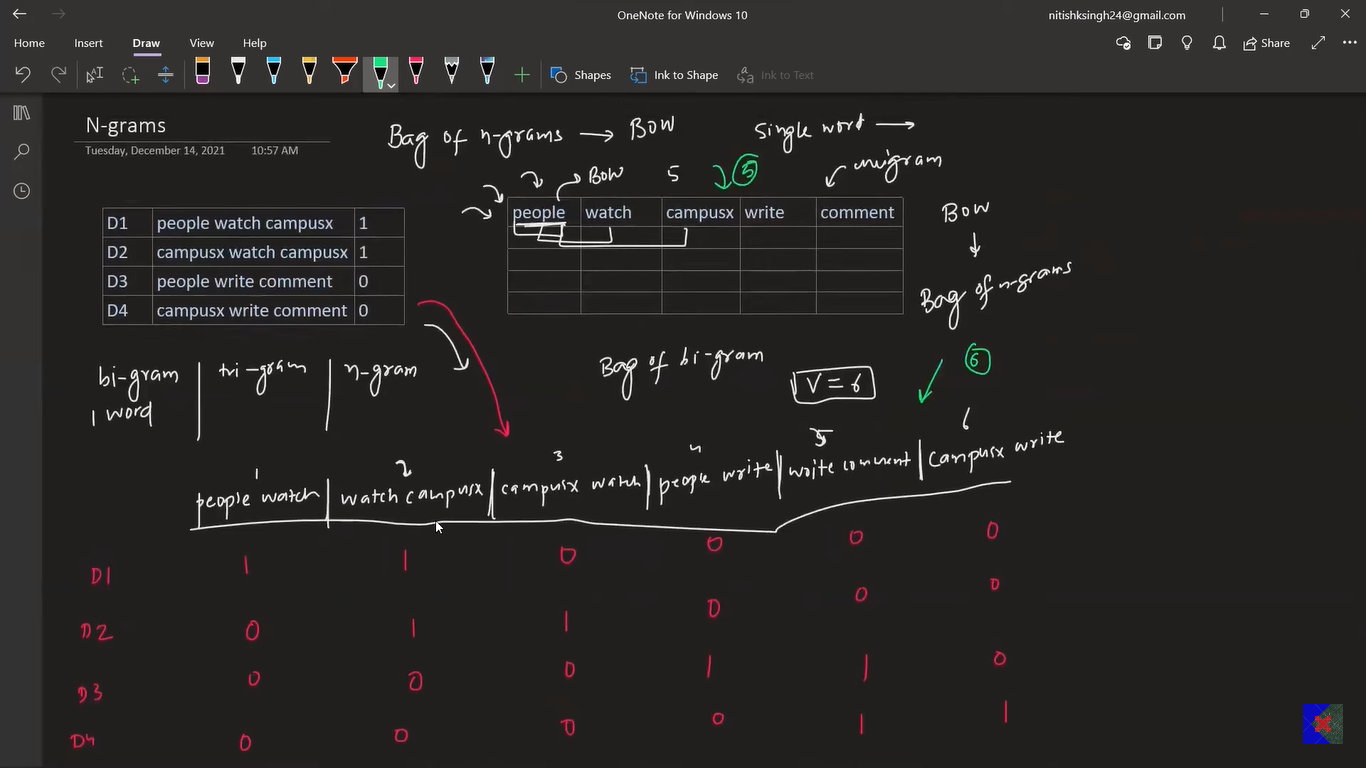
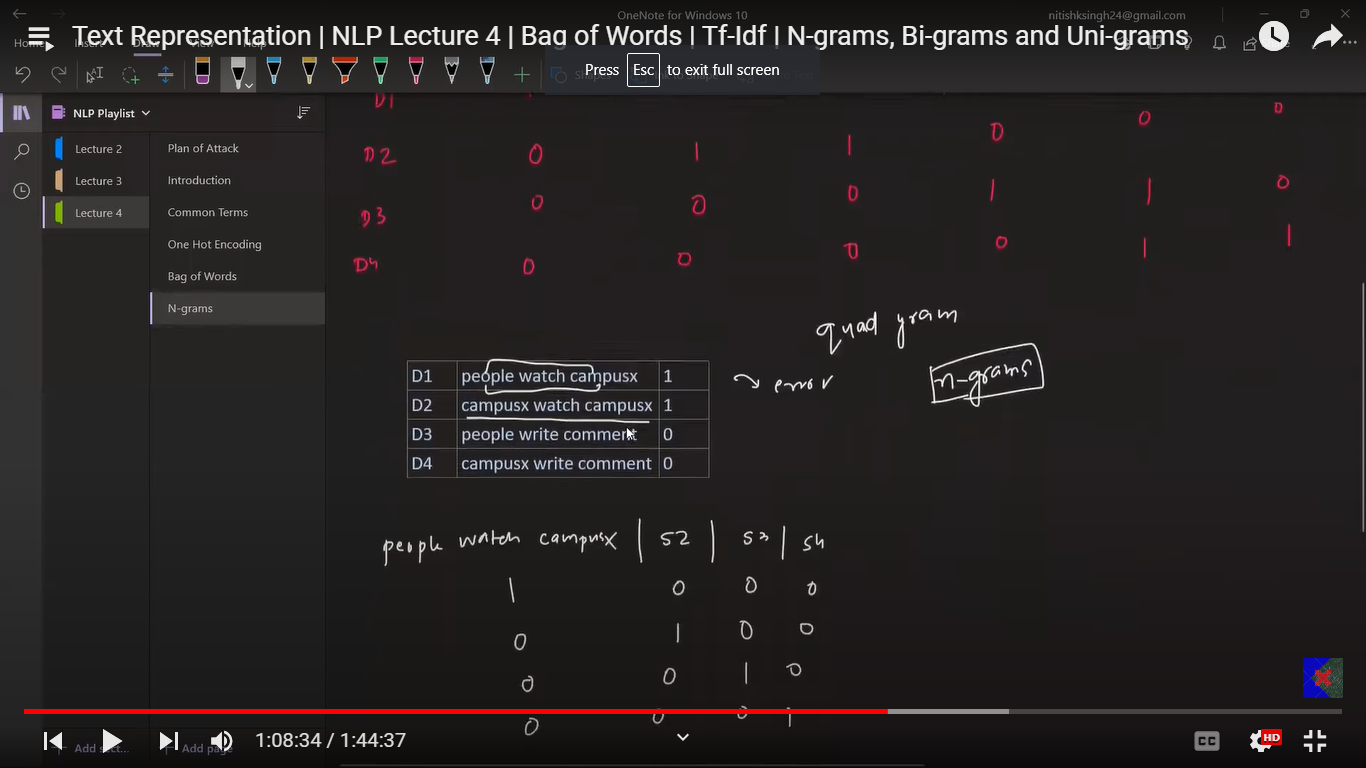
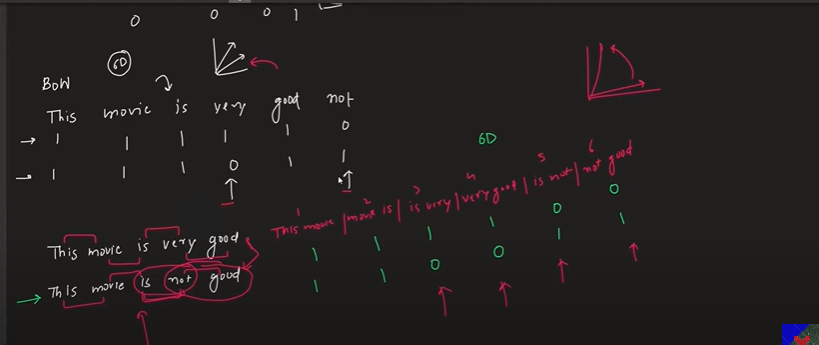
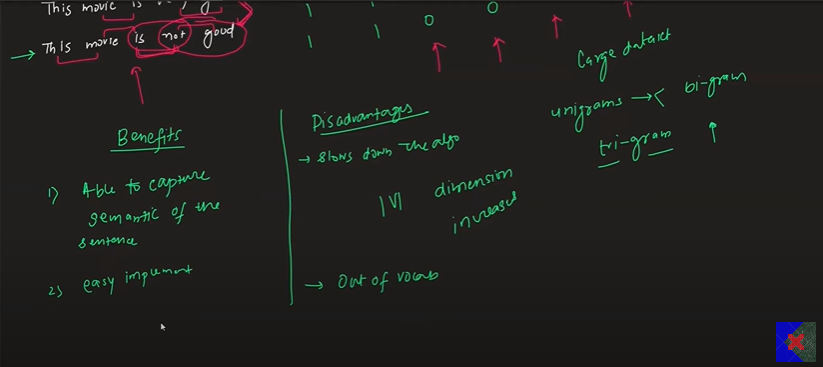

In [15]:
import pandas as pd
df = pd.DataFrame({'documents': ['people watch campusx', 'campusx watch campusx', 'people write comment', 'campusx write campusx'], 'output': ['1', '1', '0', '0']})
df

,documents,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write campusx,0


## Unigram

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1))

In [17]:
## could be written as cv.fit_transform(df['documents']) as well
bow = cv.fit_transform(df.documents) # fit_transform() does two functions: First, it fits the model and learns the vocabulary; second, it transforms our training data into feature vectors. The input to fit_transform should be a list of strings.
print(cv.vocabulary_) # prints the vocabulary of our corpus,  (Word : Index)

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


In [18]:
print(bow.toarray()) # returns the term document matrix

[[1 0 1 1 0]
 [2 0 0 1 0]
 [0 1 1 0 1]
 [2 0 0 0 1]]


In [19]:
cv.transform(['people likes to watch campusx, campusx is favourite person']).toarray() # returns the vector representation of the sentence

array([[2, 0, 1, 1, 0]], dtype=int64)

## Bi-gram

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2, 2))
bow = cv.fit_transform(df.documents) 
print(cv.vocabulary_)

{'people watch': 2, 'watch campusx': 4, 'campusx watch': 0, 'people write': 3, 'write comment': 6, 'campusx write': 1, 'write campusx': 5}


In [22]:
print(bow.toarray())
cv.transform(['people likes to watch campusx, campusx is favourite person']).toarray() 

[[0 0 1 0 1 0 0]
 [1 0 0 0 1 0 0]
 [0 0 0 1 0 0 1]
 [0 1 0 0 0 1 0]]


array([[0, 0, 0, 0, 1, 0, 0]], dtype=int64)

## Tri-gram

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(3, 3))
bow = cv.fit_transform(df.documents) 
print(cv.vocabulary_)

{'people watch campusx': 2, 'campusx watch campusx': 0, 'people write comment': 3, 'campusx write campusx': 1}


In [24]:
print(bow.toarray())
cv.transform(['people likes to watch campusx, campusx is favourite person']).toarray() 

[[0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]]


array([[0, 0, 0, 0]], dtype=int64)

## 4-gram not possible because document must have word count greater than 4

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4, 4))
bow = cv.fit_transform(df.documents) 
print(cv.vocabulary_)

ValueError: empty vocabulary; perhaps the documents only contain stop words

# 1 to 3 - grams

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3))
bow = cv.fit_transform(df.documents) 
print(len(cv.vocabulary_) )
print(cv.vocabulary_)

16
{'people': 6, 'watch': 11, 'campusx': 0, 'people watch': 7, 'watch campusx': 12, 'people watch campusx': 8, 'campusx watch': 1, 'campusx watch campusx': 2, 'write': 13, 'comment': 5, 'people write': 9, 'write comment': 15, 'people write comment': 10, 'campusx write': 3, 'write campusx': 14, 'campusx write campusx': 4}


In [29]:
print(bow.toarray())
cv.transform(['people likes to watch campusx, campusx is favourite person']).toarray() 

[[1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0]
 [2 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1]
 [2 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0]]


array([[2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0]], dtype=int64)

# TF-IDF

- TF-IDF stands for Term Frequency-Inverse Document Frequency.
- It assigns weights to the words which signify their importance in the document.
- It gives more weight to the less frequent words and less weight to the more frequent words by computing the ratio of term frequency and document frequency.

- for weightage of the word in the document we use TF and for weightage of the word in the corpus we use IDF.

- For knowing the frequency of a word or to know the rare or common words in the corpus we use IDF.
if the word is rare in the corpus:
    then high IDF value
if the word is common in the corpus:
    then low IDF value.

- TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
- IDF(t) = log_e(Total number of documents / Number of documents with term t in it).



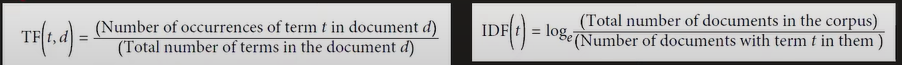


##### Calculating TF:

TF(people, D1) == 1/3 , 
TF(campusx, D2) == 2/3  (equivalent to the probability of occurrence of a word in a document)

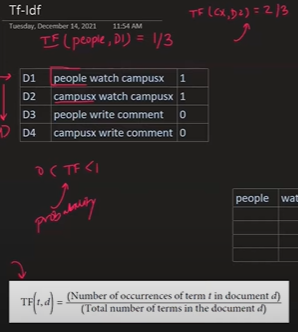

##### Calculating IDF:



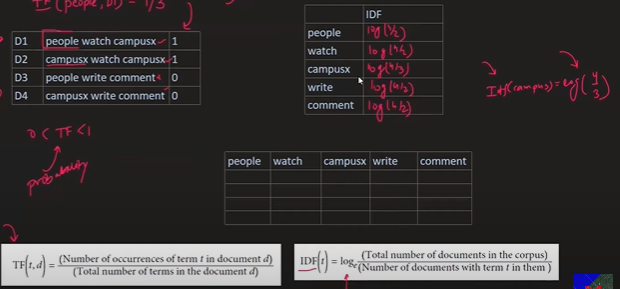


### We monitor the term frequency in document and term rare in corpus, we give more weightage to the term. by calculating the tf-idf score by using the formula tf-idf = tf * idf

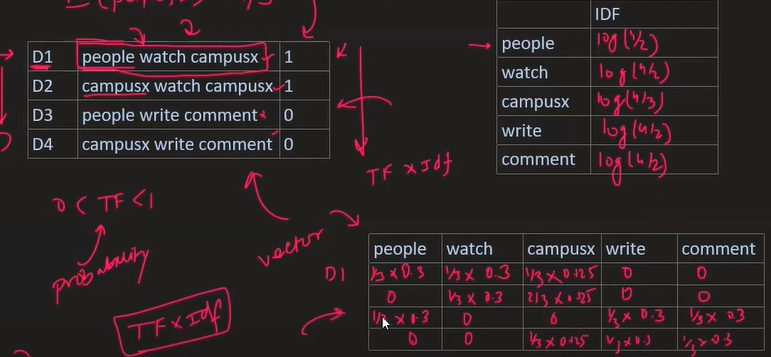


## why we take log of IDF
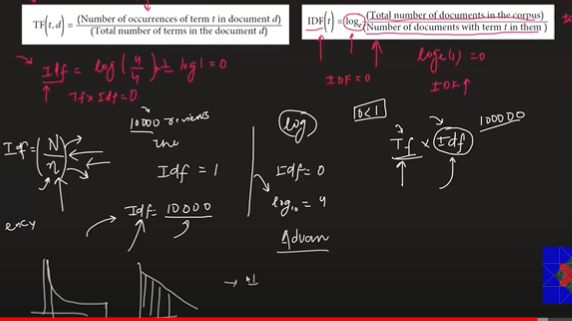

In [30]:
df

,documents,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write campusx,0


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
# tfidf.fit_transform(df.documents)
tfidf.fit_transform(df.documents).toarray()

array([[0.49681612, 0.        , 0.61366674, 0.61366674, 0.        ],
       [0.8508161 , 0.        , 0.        , 0.52546357, 0.        ],
       [0.        , 0.66767854, 0.52640543, 0.        , 0.52640543],
       [0.8508161 , 0.        , 0.        , 0.        , 0.52546357]])

In [36]:
print(tfidf.vocabulary_)
print(tfidf.idf_)  # they add 1 extra to avoid divide by zero error to IDF (log(4/4) = 0, so tf*idf = 0) to avoid this they add 1
print(tfidf.get_feature_names_out())

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}
[1.22314355 1.91629073 1.51082562 1.51082562 1.51082562]
['campusx' 'comment' 'people' 'watch' 'write']


In [ ]:
# Advantage:
""" 
- Information retrieval: It is used to rank documents based on their relevance to a given search query. ex: Google search engine.

Disadvantage:
- sparse matrix because if the size of the vocabulary is 10000, then the size of the vector will also be 10000. So, it will be a sparse vector with only 1s and 0s.

- OOV: words are not handled.
- Dimensionality: high dimensionality and many 0 entries leads to overfitting problem. how overfitting is related to dimensionality? answer: https://stats.stackexchange.com/questions/353220/why-does-high-dimensionality-lead-to-overfitting mentions that "The more dimensions you have, the more likely you are to overfit. This is because you have more freedom to fit the data more closely, and hence more chance of fitting noise in the data rather than the underlying signal."

- Semantic meaning: not preserved. ex: "This is a very beautiful " and "This is gorgeous" .
"""

# Custom Features

In [39]:
# For adding custom features we ned to use domain knowledge and add them manually. 
# new features for sentimental analysis like: 
# 1. +ve words, -ve words, ratio of them, word count, char count